In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Heart Disease.csv')
df.shape

(319795, 18)

# Removing Duplicate value


In [3]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

In [4]:
df.HeartDisease.value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

# Encoding The DataSet with LabelEncoder


In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [6]:
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

# Separating x and y

In [7]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [8]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7,0,1,1,8,3,2,0,1,6,1,0,0
319791,29.84,1,0,0,0,0,0,1,3,3,0,1,4,5,1,0,0
319792,24.24,0,0,0,0,0,0,0,5,3,0,1,2,6,0,0,0
319793,32.81,0,0,0,0,0,0,0,1,3,0,0,2,12,0,0,0


In [9]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

# Imbalance Data handling


In [10]:
df.HeartDisease.value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [11]:
not_HeartDisease=(274456/(274456+27261))*100
HeartDisease=(27261/(274456+27261))*100

In [12]:
print('No HeartDisease {} percent of the total people'.format(not_HeartDisease))

No HeartDisease 90.96471196518591 percent of the total people


In [13]:
print('HeartDisease {} percent of the total people'.format(HeartDisease))

HeartDisease 9.03528803481408 percent of the total people


In [14]:
HeartDisease_no=df[df['HeartDisease']==0]
HeartDisease_yes=df[df['HeartDisease']==1]

In [15]:
HeartDisease_no.shape

(274456, 18)

In [16]:
HeartDisease_yes.shape

(27261, 18)

# So we have to balance our dataset . Now applying Random over sampling techniques



In [17]:
from imblearn.over_sampling import RandomOverSampler
random_over_sampler = RandomOverSampler(random_state =100)

In [18]:
x_new,y_new=random_over_sampler.fit_resample(x,y)
#x1_new=x2_new=x3_new=x4_new=x5_new=x6_new=x7_new=x8_new=x9_new=x_new
x_new

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,35.43,0,0,0,0,0,0,0,12,5,0,1,4,5,0,0,1
548908,23.01,1,0,0,0,20,0,1,8,5,0,1,4,6,0,0,0
548909,30.80,0,0,0,0,0,0,0,10,4,2,0,2,5,0,0,0
548910,44.63,0,0,0,0,7,1,0,9,2,2,0,2,8,0,0,0


In [19]:
#y1_new=y2_new=y3_new=y4_new=y5_new=y6_new=y7_new=y8_new=y9_new=y_new
y_new

0         0
1         0
2         0
3         0
4         0
         ..
548907    1
548908    1
548909    1
548910    1
548911    1
Name: HeartDisease, Length: 548912, dtype: int32

In [20]:
x_new.shape

(548912, 17)

In [21]:
y_new.shape

(548912,)

# 7->GradientBoostingClassifier Algorithm implementation


# GradientBoosting Classifier for holdout cross validation with Randon Over Sampling


In [22]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()


In [23]:
over_xtrain,over_xtest,over_ytrain,over_ytest = train_test_split(x_new,y_new,test_size = 0.30 ,random_state =42)
gbc.fit(over_xtrain,over_ytrain)

GradientBoostingClassifier()

In [24]:
OverSampleing_dataset_accuracy6 = gbc.score(over_xtest,over_ytest)
OverSampleing_dataset_accuracy6

0.7623729307601685

# GradientBoostingClassifier for KFold cross validation for Random Over sampling


In [25]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10)

In [26]:
OverSampleingDataset_kfold_result6= cross_val_score(gbc,x_new,y_new,cv = kfold)
OverSampleingDataset_kfold_result6

array([0.69483713, 0.69399913, 0.69144304, 0.70266528, 0.70118963,
       0.75480498, 0.74979505, 0.74728098, 0.7517808 , 0.75278279])

In [27]:
OverSampleingDataset_kfold_result6.mean()

0.7240578804608035

# GradientBoostingClassifier for StratiFied KFold cross validation for Over sampling


In [28]:
from sklearn.model_selection import StratifiedKFold
Stf_Kfold = StratifiedKFold(n_splits = 10)

In [29]:
OverSampleingDataset_Sf_kfold_result6= cross_val_score(gbc,x_new,y_new,cv = Stf_Kfold)
OverSampleingDataset_Sf_kfold_result6

array([0.76471981, 0.75919988, 0.7642783 , 0.75906797, 0.76471553,
       0.75469567, 0.76932466, 0.75301962, 0.76906961, 0.75934124])

In [30]:
OverSampleingDataset_Sf_kfold_result6.mean()

0.7617432294552899

# Now from over sampling ,we calculate all confusion matrix performance

                    

In [31]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve
gbc.fit(over_xtrain,over_ytrain)

GradientBoostingClassifier()

In [32]:
pred_y6=gbc.predict(over_xtest)#Predicted Class 
pred_y6

array([1, 1, 0, ..., 1, 1, 1])

In [33]:
over_ytest

374936    1
319916    1
56188     0
444156    1
170814    0
         ..
285161    0
217312    1
353792    1
318432    1
216193    0
Name: HeartDisease, Length: 164674, dtype: int32

In [34]:
np.array(over_ytest) #actual class/y

array([1, 1, 0, ..., 1, 1, 0])

In [35]:
print(classification_report(over_ytest,pred_y6))


              precision    recall  f1-score   support

           0       0.78      0.72      0.75     82143
           1       0.74      0.80      0.77     82531

    accuracy                           0.76    164674
   macro avg       0.76      0.76      0.76    164674
weighted avg       0.76      0.76      0.76    164674



In [38]:
cm6=confusion_matrix(over_ytest,pred_y6)
cm6

array([[59358, 22785],
       [16346, 66185]], dtype=int64)

# Visualization with heatmap performance of confussion matrix for GradientBoosting Classifier


Text(33.0, 0.5, 'Actual Values')

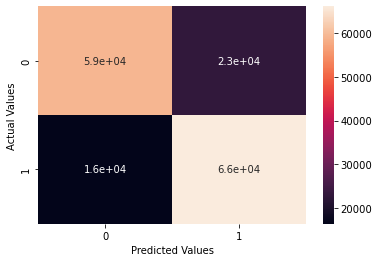

In [39]:
sns.heatmap(cm6,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [40]:
tp,fn,fp,tn=confusion_matrix(over_ytest,pred_y6).reshape(-1)

In [41]:
tp

59358

In [42]:
fn

22785

In [43]:
fp

16346

In [44]:
tn

66185

# Accuracy

In [45]:

(tp+tp)/(tp+fn+fp+tn)

0.7209152628830295

In [46]:
#precision
ppv = tp/(tp+fp)
print(ppv)

0.7840801014477439


In [47]:
#Recall
trp = tp/(tp+fn)
print(trp)

0.7226178737080458


In [48]:
#1-Specificity
fpr = fp/(fp+tn)
print(fpr)

0.19805891119700475


In [49]:
#F1-score
f1_score = (2*ppv*trp)/(ppv+trp)
print(f1_score)

0.7520953835042794


In [50]:
#Specificity
tnr = tn/(tn+fp)
print(tnr)

0.8019410888029952


In [51]:
#CSI
csi = tp/(tp+fn+fp)
print(csi)

0.6026865944420189


In [52]:
#FDR
fdr = fp/(tp+fp)
print(fdr)

0.21591989855225616


# Roc and Auc curve for GradientingBoosting classifier


C:\Users\WIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


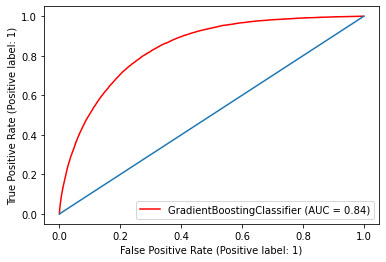

In [53]:
plot_roc_curve(gbc,over_xtest,over_ytest,color='red')
plt.plot([0,1],[0,1])

# Tuning GradientBoosting Classifier Algorithm using Randomized Search CV

In [59]:
n_estimators=np.random.randint(15,200,20)
loss=['deviance','exponential']
criterion=['friedman_mse', 'squared_error', 'mse', 'mae']
max_features=['auto','sqrt','log2']
max_depth=np.random.randint(1,12,20)
min_samples_split=np.random.randint(1,12,15)
parameters={
    'n_estimators':n_estimators,
    'loss':loss,
     'criterion':criterion,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [60]:
print(parameters)

{'n_estimators': array([ 91,  86,  96,  61, 187, 126, 192, 102,  24,  27,  47,  90, 183,
       184, 110, 130, 167, 128,  46,  37]), 'loss': ['deviance', 'exponential'], 'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([ 6,  1,  7,  9,  5,  7,  1,  8,  4,  4,  9,  4,  7,  1,  1,  3,  2,
        2,  9, 10]), 'min_samples_split': array([ 9,  7, 10,  1,  7,  4,  4,  9,  5,  2,  1,  4,  7,  4,  7])}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import warnings 
warnings.filterwarnings('ignore')  
r=RandomizedSearchCV(gbc,parameters,n_iter=100,cv=3)
r.fit(over_xtrain,over_ytrain)

In [ ]:
r.cv_results_

In [ ]:
result=pd.DataFrame(r.cv_results_)
result

In [ ]:
new_r=r.best_estimator_
new_r

In [ ]:
new_r.fit(over_xtrain,over_ytrain)

In [ ]:
new_r.score(over_xtrain,over_ytrain)